<a href="https://colab.research.google.com/github/svenfahrni/diba-regex-demo/blob/main/keras_intro_HSLuzern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://www.tensorflow.org/tutorials


In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


Install required packages. Numpy is for mathematical operations. Matplotlib.pyplot is for plotting. 
Tensorflow is a library used for neural networks. Keras is a neural network library within tensorflow.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Read in the data. The data is available from keras library.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Add class names (by default classes are only numbers).

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Check the dimension of the training set of images.

In [ ]:
train_images.shape

(60000, 28, 28)

Check the length of the labels for the training set.

In [ ]:
len(train_labels)

60000

Have a look at the labels of the training set.

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Check the dimentions of the test set of images.

In [ ]:
test_images.shape

(10000, 28, 28)

Check the lenght of the vector of labels for the testing set

In [ ]:
len(test_labels)

10000

Preprocess the data

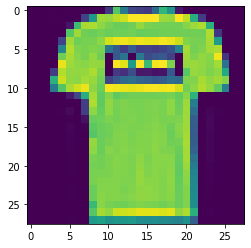

In [ ]:
plt.figure()  # create new figure
plt.imshow(train_images[1]) # show the first image from the training set. How could you show the 10th image?
#plt.colorbar() # add the colorbar to the plot. See what happens when you remove this line
plt.grid(False) # Do not show the grid on the plot. See what happens if you change False to True


Scale the values in the images to the range 0-1

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0


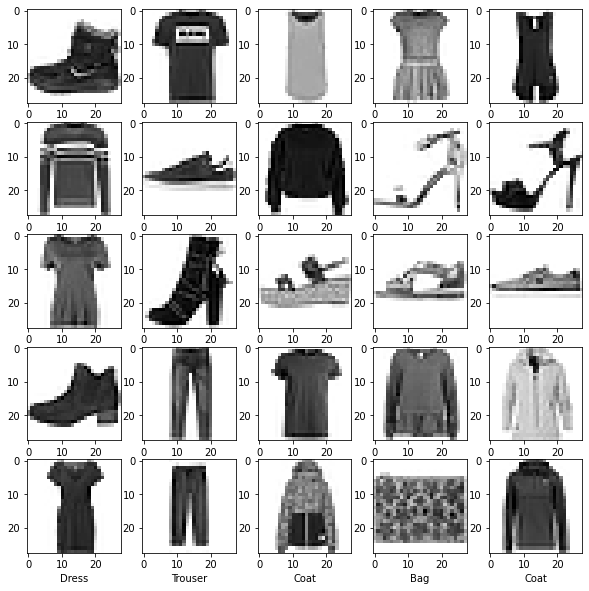

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # split plot into 5 x 5 table. Use the i+1 place to plot the next image. 
  # plt.xticks([])
  # plt.yticks([])
  # plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # plt.cm.binary allows to show black-white image. 
    #Check what happens if you uncomment the rest of the line
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Build the model. We are adding different layers to the network, which well be trained later on the training data set. The parameters of these layers will be learned during training. The first layer, Flatten, has no parameters to learn; it only reformats the data.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10)
])

Setting more parameters of the model - what exactly we would like to optimize.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model
Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the test_images array.
4. Verify that the predictions match the labels from the test_labels array.

Feed the data into the model. The learning process will be repreated 10 times (number of epochs).

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5142 - accuracy: 0.8137
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3745 - accuracy: 0.8616
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy: 0.8749
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3159 - accuracy: 0.8823
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2972 - accuracy: 0.8885
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2856 - accuracy: 0.8933
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2727 - accuracy: 0.8978
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2614 - accuracy: 0.9006
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2501 - accuracy: 0.9063
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.243

Evaluate accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3462 - accuracy: 0.8805 - 513ms/epoch - 2ms/step

Test accuracy: 0.8805000185966492


Make predicitons

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([7.77961418e-07, 1.09569865e-13, 1.76196572e-05, 1.66146261e-08,
       4.02004588e-07, 1.06930197e-03, 4.99874275e-08, 1.17654528e-03,
       4.92990149e-10, 9.97735262e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify predictions

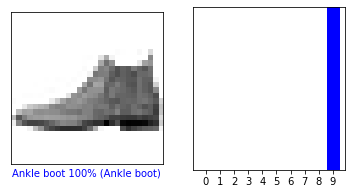

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

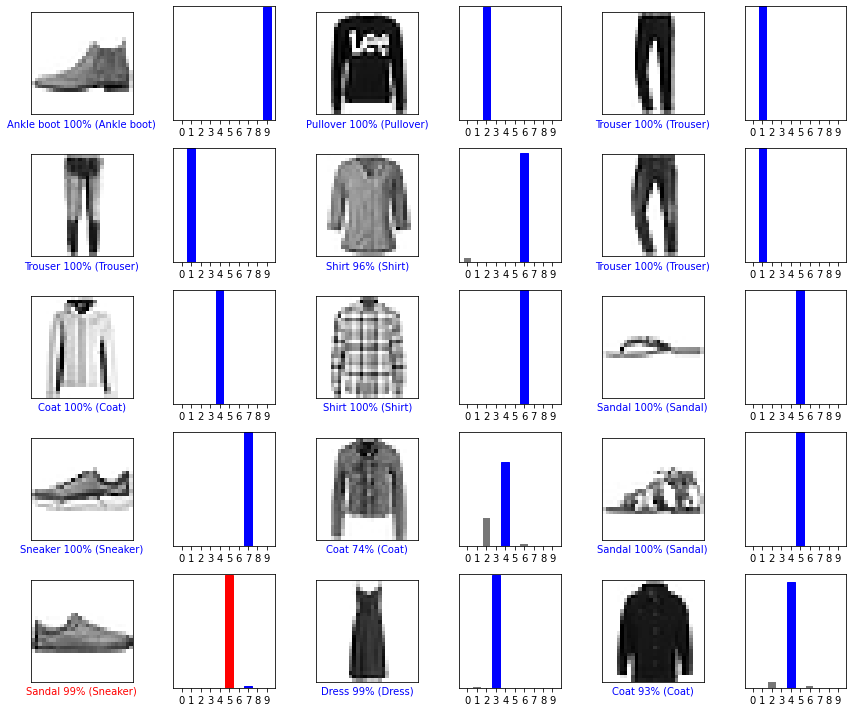

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset.
n = 25
img = test_images[n]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[8.4097002e-04 1.4889876e-05 7.8022885e-01 1.3896513e-04 1.2707451e-01
  1.5689255e-07 9.1629565e-02 9.2203706e-08 6.6612512e-05 5.2513551e-06]]


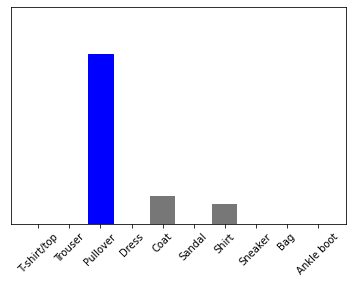

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

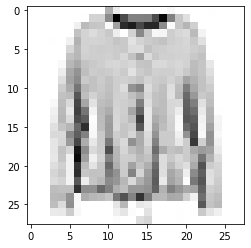

In [ ]:
plt.imshow(test_images[n], cmap=plt.cm.binary)
plt.show()

Try another data set:  https://keras.io/datasets/
Try to solve: https://www.kaggle.com/c/digit-recognizer